## Load Imports

In [ ]:
import os
from random import shuffle
import numpy as np
import cv2
import numpy as np

## Set Paths and variables
Initialized the directories and set the image size and learning rate

In [30]:
female_eyes = 'D:/Projects/Internship Trendzlink/Text Detection/CNN/Train/femaleeyes'
male_eyes = 'D:/Projects/Internship Trendzlink/Text Detection/CNN/Train/maleeyes'
test_set = 'D:/Projects/Internship Trendzlink/Text Detection/CNN/family'
img_size = 50
lr = 1e-3
MODEL_NAME = 'model'
train_data = []

In [3]:
def train_male(train_data):
    for img in os.listdir(male_eyes):
        path = os.path.join(male_eyes, img)
        image = cv2.resize(cv2.imread(path), (img_size, img_size))
        train_data.append([np.array(image), np.array([0,1])])
    return train_data
        

In [4]:
def train_female(train_data):
    for img in os.listdir(female_eyes):
        path = os.path.join(female_eyes, img)
        image = cv2.resize(cv2.imread(path), (img_size, img_size))
        train_data.append([np.array(image), np.array([1,0])])
    shuffle(train_data)
    return train_data

In [34]:
def process_test_data():
    test_data = []
    for img in os.listdir(test_set):
        path = os.path.join(test_set, img)
        img = cv2.resize(cv2.imread(path), (img_size, img_size))
        test_data.append([np.array(img), ['X']])
    shuffle(test_data)
    return test_data

In [5]:
train_data = train_male(train_data)


In [6]:
train_data = train_female(train_data)

In [50]:
test_data = process_test_data()
print(len(test_data))

7


In [7]:
print(len(train_data))

9041


In [8]:
train = train_data[:-1000]
test =  train_data[-1000:]



In [9]:
train_X = np.array([i[0] for i in train]).reshape(-1, img_size,img_size, 3 )
train_Y = [i[1] for i in train]

test_X = np.array([i[0] for i in test]).reshape(-1, img_size,img_size, 3 )
test_Y = [i[1] for i in test]

In [10]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

from tensorflow.python.framework import ops
ops.reset_default_graph()


# Building convolutional convnet
convnet = input_data(shape=[None, img_size, img_size, 3], name='input')
# http://tflearn.org/layers/conv/
# http://tflearn.org/activations/


convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)


convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 32, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu')
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=lr, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir = 'log')


Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.fit({'input': train_X}, {'targets': train_Y}, n_epoch=50, validation_set=({'input': test_X}, {'targets': test_Y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 6299  | total loss: 0.01501 | time: 15.606s
| Adam | epoch: 050 | loss: 0.01501 - acc: 0.9955 -- iter: 8000/8041
Training Step: 6300  | total loss: 0.01409 | time: 16.733s
| Adam | epoch: 050 | loss: 0.01409 - acc: 0.9960 | val_loss: 0.37750 - val_acc: 0.9220 -- iter: 8041/8041
--


In [29]:
model.save('gender_detector')

INFO:tensorflow:D:\Projects\Internship Trendzlink\Text Detection\CNN\gender_detector is not in all_model_checkpoint_paths. Manually adding it.


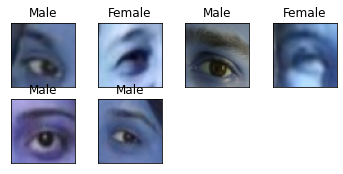

In [49]:
import matplotlib.pyplot as plt



fig=plt.figure()

for num,data in enumerate(test_data[:7]):
    # Female: [1,0]
    # Male: [0,1]
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(img_size,img_size,3)
    #model_out = model.predict([data])[0]
    model_out = model.predict([data])[0]
    model_out = model_out.round()
#     print(model_out)
    
    if model_out[0] == 0: str_label='Male'
    else: str_label='Female'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
